In [9]:
import random
import pandas as pd
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
Population = 10
mutation = 0.1
max_gen = 20

def generate_board_state():
    board_state = [random.randint(0,7) for _ in range(8)]
    return board_state

def calc_fitness_func(board_state):
    conflicts = 0
    for i in range(8):
        for j in range(i+1, 8):
            if board_state[i] == board_state[j] or abs(board_state[i] - board_state[j]) == j-1:
                conflicts += 1
    return 28 - conflicts



In [11]:
def selection(population):
    size = 5
    tournament = random.sample(population,size)
    return max(tournament, key = lambda x: x[1])

def crossover(p1, p2):
    crossover_pt = random.randint(1,7)
    child = parent1[:crossover_pt] + parent2[crossover_pt:]
    return child

def mutate(board_state):
    pos1, pos2 = random.sample(range(8),2)
    board_state[pos1], board_state[2] = board_state[pos2],board_state[pos1]
    return board_state

population = [(generate_board_state(),0) for _ in range(Population)]
    
for generation in range(max_gen):
    population = [(board_state, calc_fitness_func(board_state)) for board_state, _ in population]
    best_board_state = max(population, key=lambda x:x[1])[0]
    if calc_fitness_func(best_board_state) == 28:
        print("Solution in :", generation)
        break
new_population = []
new_population.append(max(population, key=lambda x: x[1]))

while len(new_population) < Population:
        parent1 = selection(population)
        parent2 = selection(population)
        child = crossover(parent1[0], parent2[0])
        if random.random() < MUTATION_RATE:
            child = mutate(child)
        new_population.append((child, 0))

population = new_population

print("Best solution:", best_board_state)


IndexError: tuple index out of range

In [137]:
import random

POPULATION_SIZE = 10
MUTATION_RATE = 0.1
MAX_GENERATIONS = 50

def generate_board_state():
    board_state = [random.randint(0, 7) for _ in range(8)]
    return board_state

def calculate_fitness(board_state):
    conflicts = 0
    for i in range(8):
        for j in range(i + 1, 8):
            if board_state[i] == board_state[j] or abs(board_state[i] - board_state[j]) == j - i:
                conflicts += 1
    return 28 - conflicts  

def tournament_selection(population):
    tournament_size = 5
    tournament = random.sample(population, tournament_size)
    return max(tournament, key=lambda x: x[1])

def crossover(parent1, parent2):
    crossover_point = random.randint(1, 7)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child

def mutate(board_state):
    pos1, pos2 = random.sample(range(8), 2)
    board_state[pos1], board_state[pos2] = board_state[pos2], board_state[pos1]
    return board_state

population = [(generate_board_state(), 0) for _ in range(POPULATION_SIZE)]

for generation in range(MAX_GENERATIONS):
    population = [(board_state, calculate_fitness(board_state)) for board_state, _ in population]

    # Check if solution is found
    best_board_state = max(population, key=lambda x: x[1])[0]
    if calculate_fitness(best_board_state) == 28:
        print("Solution found in generation", generation)
        break

    # Create the next generation
    new_population = []

    new_population.append(max(population, key=lambda x: x[1]))

    while len(new_population) < POPULATION_SIZE:
        parent1 = tournament_selection(population)
        parent2 = tournament_selection(population)
        child = crossover(parent1[0], parent2[0])
        if random.random() < MUTATION_RATE:
            child = mutate(child)
        new_population.append((child, 0))

    # Update the population
    population = new_population

print("Best solution:", best_board_state)

Best solution: [4, 4, 7, 0, 3, 6, 6, 3]


In [146]:
import random
import matplotlib.pyplot as plt

POPULATION_SIZE = 50
MUTATION_RATE = 0.1
MAX_GENERATIONS = 100

def generate_board_state():
    board_state = [random.randint(0, 7) for _ in range(8)]
    return board_state

def calculate_fitness(board_state):
    conflicts = 0
    for i in range(8):
        for j in range(i + 1, 8):
            if board_state[i] == board_state[j] or abs(board_state[i] - board_state[j]) == j - i:
                conflicts += 1
    return 28 - conflicts 

def tournament_selection(population):
    tournament_size = 5
    tournament = random.sample(population, tournament_size)
    return max(tournament, key=lambda x: x[1])

def crossover(parent1, parent2):
    crossover_point = random.randint(1, 7)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child

def mutate(board_state):
    pos1, pos2 = random.sample(range(8), 2)
    board_state[pos1], board_state[pos2] = board_state[pos2], board_state[pos1]
    return board_state

population = [(generate_board_state(), 0) for _ in range(POPULATION_SIZE)]

fitness_history = []

# Main Genetic Algorithm loop

for generation in range(MAX_GENERATIONS):
        # Calculate fitness for each board state
        population = [(board_state, calculate_fitness(board_state)) for board_state, _ in population]
        
        best_board_state = max(population, key=lambda x: x[1])[0]
        best_fitness = calculate_fitness(best_board_state)
        fitness_history.append(best_fitness)
        
        if best_fitness == 28:
            print("Solution found in generation", generation)
            break
            
        new_population = []
        new_population.append(max(population, key=lambda x: x[1]))

        while len(new_population) < POPULATION_SIZE:
            parent1 = tournament_selection(population)
            parent2 = tournament_selection(population)
            child = crossover(parent1[0], parent2[0])
            if random.random() < MUTATION_RATE:
                child = mutate(child)
                new_population.append((child, 0))
            
            population = new_population

# Print the best solution
print("Best solution:", best_board_state)

plt.plot(fitness_history)
plt.title('Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.ylim(0, 28)  # Since the maximum fitness is 28
plt.grid()
plt.show()

ValueError: Sample larger than population or is negative

Solution found in generation 22
Best solution: [5, 3, 6, 0, 7, 1, 4, 2]


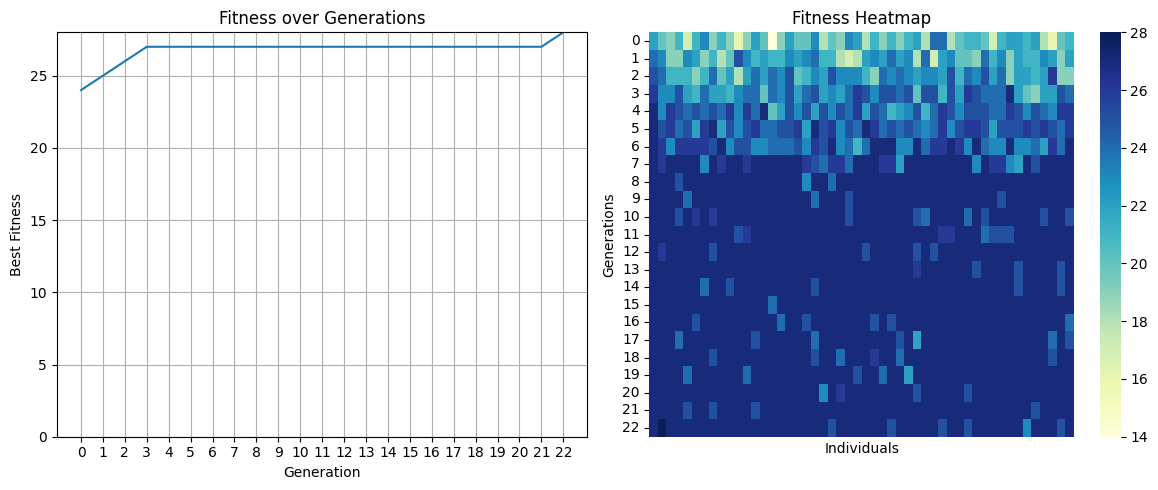

In [185]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Genetic Algorithm parameters
POPULATION_SIZE = 50
MUTATION_RATE = 0.1
MAX_GENERATIONS = 100

def generate_board_state():
    return [random.randint(0, 7) for _ in range(8)]

def calculate_fitness(board_state):
    conflicts = 0
    for i in range(8):
        for j in range(i + 1, 8):
            if board_state[i] == board_state[j] or abs(board_state[i] - board_state[j]) == j - i:
                conflicts += 1
    return 28 - conflicts  # Max fitness = 28 (no conflicts)

def tournament_selection(population):
    tournament_size = 5
    tournament = random.sample(population, tournament_size)
    return max(tournament, key=lambda x: x[1])

def crossover(parent1, parent2):
    crossover_point = random.randint(1, 7)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child

def mutate(board_state):
    pos1, pos2 = random.sample(range(8), 2)
    mutated_state = board_state[:]
    mutated_state[pos1], mutated_state[pos2] = mutated_state[pos2], mutated_state[pos1]
    return mutated_state

population = [(generate_board_state(), 0) for _ in range(POPULATION_SIZE)]
population = [(board_state, calculate_fitness(board_state)) for board_state, _ in population]

fitness_history = []
fitness_matrix = []

for generation in range(MAX_GENERATIONS):
    population = [(board_state, calculate_fitness(board_state)) for board_state, _ in population]
    
    fitness_matrix.append([fitness for _, fitness in population])
    best_board_state, best_fitness = max(population, key=lambda x: x[1])
    fitness_history.append(best_fitness)

    if best_fitness == 28:
        print("Solution found in generation", generation)
        break

    new_population = []

    new_population.append((best_board_state, best_fitness))

    while len(new_population) < POPULATION_SIZE:
        parent1 = tournament_selection(population)
        parent2 = tournament_selection(population)
        child = crossover(parent1[0], parent2[0])
        if random.random() < MUTATION_RATE:
            child = mutate(child)
        new_population.append((child, calculate_fitness(child)))
    population = new_population

print("Best solution:", best_board_state)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fitness_history)
plt.title('Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.ylim(0, 28)  
plt.xticks(range(len(fitness_history)))  
plt.grid()

# Plot heatmap of fitness scores
plt.subplot(1, 2, 2)
sns.heatmap(fitness_matrix, cmap='YlGnBu', cbar=True, xticklabels=False, yticklabels=range(len(fitness_matrix)))
plt.title('Fitness Heatmap')
plt.xlabel('Individuals')
plt.ylabel('Generations')

plt.tight_layout()
plt.show()


